In [ ]:
# ola case study

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import time

In [54]:
df2 = pd.read_csv("C:\\Users\\DELL\\Downloads\\ola_driver_scaler.csv\\ola_driver_scaler.csv")


In [36]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\ola_driver_scaler.csv\\ola_driver_scaler.csv")

df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [38]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\3944046961.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\3944046961.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\3944046961.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [39]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
df['Negative TBV'] = (df['Total Business Value'] < 0).astype(int)
df['Zero_TBV']=(df['Total Business Value'] == 0).astype(int)

In [41]:
df.head(20)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,1
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1,0,0
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1,0,1


In [42]:
df.describe()

,MMM-YY,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
count,19104,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,0.418749,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899,0.007799,0.340191
min,2019-01-01 00:00:00,1.000000,21.000000,0.000000,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000,0.000000,0.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,0.000000,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,0.000000,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000,0.000000,0.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,1.000000,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000,0.000000,1.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,1.000000,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000,1.000000,1.000000
std,NaN,810.705321,6.257912,0.493367,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832,0.087972,0.473785


In [43]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Negative TBV                0
Zero_TBV                    0
dtype: int64

In [45]:
df['Quarter'] = df['MMM-YY'].dt.to_period('Q')

In [46]:
df.head(20)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarter
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,2019Q1
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,1,0,2019Q1
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,1,2019Q1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,1,2020Q4
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,1,2020Q4
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1,2019Q4
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1,2020Q1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1,0,1,2020Q1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1,0,0,2020Q1
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1,0,1,2020Q2


In [47]:
quarterly_total_business_value = df.groupby(['Driver_ID', 'Quarter'])['Total Business Value'].sum()

In [48]:
quarterly_total_business_value = quarterly_total_business_value.reset_index()

In [50]:
print(quarterly_total_business_value)

      Driver_ID Quarter  Total Business Value
0             1  2019Q1               1715580
1             2  2020Q4                     0
2             4  2019Q4                     0
3             4  2020Q1                350000
4             4  2020Q2                     0
...         ...     ...                   ...
7352       2787  2019Q1                977830
7353       2787  2019Q2                     0
7354       2788  2020Q2                     0
7355       2788  2020Q3               1686340
7356       2788  2020Q4                611900

[7357 rows x 3 columns]


In [51]:
unique_drivers = df['Driver_ID'].unique()
df_grouped = df.groupby('Driver_ID').agg({
    'MMM-YY': 'first',
    'Age': 'max',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': np.mean,
    'Negative TBV': 'sum',
    'Zero_TBV': 'sum'

})
df_grouped.head(20)

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
Driver_ID,,,,,,,,,,,,,,
1,2019-01-01,28.0,0.0,C23,2,57387.000000,2018-12-24,2019-03-11,1,1,1715580,2.000000,1,1
2,2020-11-01,31.0,0.0,C7,2,67016.000000,2020-11-06,NaT,2,2,0,1.000000,0,2
4,2019-12-01,43.0,0.0,C13,2,65603.000000,2019-12-07,2020-04-27,2,2,350000,1.000000,0,4
5,2019-01-01,29.0,0.0,C9,0,46368.000000,2019-01-09,2019-03-07,1,1,120360,1.000000,0,2
6,2020-08-01,31.0,1.0,C11,1,78728.000000,2020-07-31,NaT,3,3,1265000,1.600000,0,4
8,2020-09-01,34.0,0.0,C2,0,70656.000000,2020-09-19,2020-11-15,3,3,0,1.000000,0,3
11,2020-12-01,28.0,1.0,C19,2,42172.000000,2020-12-07,NaT,1,1,0,1.000000,0,1
12,2019-07-01,35.0,0.0,C23,2,28116.000000,2019-06-29,2019-12-21,1,1,2607180,2.500000,0,3
13,2019-01-01,31.0,0.0,C19,2,119227.000000,2015-05-28,2020-11-25,1,4,10213040,1.260870,0,4


In [64]:
df_grouped.shape

(2381, 14)

In [65]:
df_grouped['Negative TBV'].value_counts()

Negative TBV
0    2245
1     125
2       9
3       2
Name: count, dtype: int64

In [66]:
df_grouped['Zero_TBV'].value_counts()

Zero_TBV
2     533
1     520
3     474
4     350
5     210
0     148
6      70
7      39
8      15
9       8
10      6
11      5
12      1
15      1
14      1
Name: count, dtype: int64

In [67]:
df_grouped.isna().sum()

MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
Negative TBV              0
Zero_TBV                  0
dtype: int64

In [68]:
df_grouped.duplicated().sum()

0

In [69]:
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_increased'].value_counts()

Quarterly_Rating_increased
0    2365
1      16
Name: count, dtype: int64

In [70]:
df_grouped.head(10)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.00000,1,1,0
1,2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.00000,0,2,0
2,4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.00000,0,4,0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.00000,0,2,0
4,6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.60000,0,4,0
5,8,2020-09-01,34.0,0.0,C2,0,70656.0,2020-09-19,2020-11-15,3,3,0,1.00000,0,3,0
6,11,2020-12-01,28.0,1.0,C19,2,42172.0,2020-12-07,NaT,1,1,0,1.00000,0,1,0
7,12,2019-07-01,35.0,0.0,C23,2,28116.0,2019-06-29,2019-12-21,1,1,2607180,2.50000,0,3,0
8,13,2019-01-01,31.0,0.0,C19,2,119227.0,2015-05-28,2020-11-25,1,4,10213040,1.26087,0,4,0
9,14,2020-10-01,39.0,1.0,C26,0,19734.0,2020-10-16,NaT,3,3,0,1.00000,0,3,0


In [71]:
def qrt_rat_dec(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] < rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_dec).reset_index(name='Quarterly_Rating_decreased')

df_grouped = pd.merge(left=df_grouped,
                right=Quarterly_Rating_decreased,
                on="Driver_ID",
                how="outer")

df_grouped['Quarterly_Rating_decreased'].value_counts()

Quarterly_Rating_decreased
0    2251
1     130
Name: count, dtype: int64

In [72]:
df_grouped.head(10)

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.00000,1,1,0,0
1,2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.00000,0,2,0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.00000,0,4,0,0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.00000,0,2,0,0
4,6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.60000,0,4,0,0
5,8,2020-09-01,34.0,0.0,C2,0,70656.0,2020-09-19,2020-11-15,3,3,0,1.00000,0,3,0,0
6,11,2020-12-01,28.0,1.0,C19,2,42172.0,2020-12-07,NaT,1,1,0,1.00000,0,1,0,0
7,12,2019-07-01,35.0,0.0,C23,2,28116.0,2019-06-29,2019-12-21,1,1,2607180,2.50000,0,3,0,0
8,13,2019-01-01,31.0,0.0,C19,2,119227.0,2015-05-28,2020-11-25,1,4,10213040,1.26087,0,4,0,0
9,14,2020-10-01,39.0,1.0,C26,0,19734.0,2020-10-16,NaT,3,3,0,1.00000,0,3,0,0


In [73]:
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_income'].value_counts()

Increased_income
0    2370
1      11
Name: count, dtype: int64

In [76]:
# Calculate the count of drivers with decreased Income
def dec_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] < inc.iloc[-2])
    else:
        return 0

Decreased_income = df.groupby("Driver_ID")["Income"].apply(dec_income).reset_index(name='Decreased_income')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_income,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_income'].value_counts()

Decreased_income
0    2380
1       1
Name: count, dtype: int64

In [74]:
def inc_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]>grd.iloc[-2])
  else:
    return 0

Increased_grade = df.groupby("Driver_ID")["Grade"].apply(inc_grade).reset_index(name='Increased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Increased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Increased_grade'].value_counts()

Increased_grade
0    2370
1      11
Name: count, dtype: int64

In [75]:
def dec_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]<grd.iloc[-2])
  else:
    return 0

Decreased_grade = df.groupby("Driver_ID")["Grade"].apply(dec_grade).reset_index(name='Decreased_grade')

df_grouped = pd.merge(left=df_grouped,
                right=Decreased_grade,
                on="Driver_ID",
                how="outer")

df_grouped['Decreased_grade'].value_counts()

Decreased_grade
0    2380
1       1
Name: count, dtype: int64

In [ ]:
# we aredropping because it is not making a much difference

In [77]:
df_grouped=df_grouped.drop(['Decreased_income', 'Decreased_grade'], axis=1)

In [78]:
df_grouped['JoiningYear']=df_grouped['Dateofjoining'].dt.year

In [79]:
df_grouped['TBV2Inc']=df_grouped['Total Business Value']//df_grouped['Income']

In [80]:
df_grouped['target'] = df_grouped['LastWorkingDate'].notnull().astype(int)

In [81]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

In [82]:
df_grouped['target'].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

In [83]:
df_grouped.describe()

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased,Increased_income,Increased_grade,JoiningYear,TBV2Inc,target
count,2381.000000,2381,2381.000000,2381.000000,2381.00000,2381.000000,2381,1616,2381.000000,2381.000000,...,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,2019-08-30 15:12:37.496849920,33.663167,0.410332,1.00756,59232.460484,2019-02-08 07:14:50.550189056,2019-12-21 20:59:06.534653440,1.820244,2.097018,...,1.566304,0.062579,2.729525,0.006720,0.054599,0.004620,0.004620,2018.536329,71.417472,0.678706
min,1.000000,2019-01-01 00:00:00,21.000000,0.000000,0.00000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,-27.000000,0.000000
25%,695.000000,2019-01-01 00:00:00,29.000000,0.000000,0.00000,39104.000000,2018-06-29 00:00:00,2019-06-06 00:00:00,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
50%,1400.000000,2019-07-01 00:00:00,33.000000,0.000000,1.00000,55285.000000,2019-07-21 00:00:00,2019-12-20 12:00:00,2.000000,2.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,15.000000,1.000000
75%,2100.000000,2020-05-01 00:00:00,37.000000,1.000000,2.00000,75835.000000,2020-05-02 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,...,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,79.000000,1.000000
max,2788.000000,2020-12-01 00:00:00,58.000000,1.000000,2.00000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,...,4.000000,3.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,1058.000000,1.000000
std,806.161628,NaN,5.983375,0.491997,0.81629,28298.214012,NaN,NaN,0.841433,0.941702,...,0.719652,0.267006,1.814717,0.081716,0.227243,0.067827,0.067827,1.609597,125.767775,0.467071


In [84]:
print('% of attrition based on Education Level')
print(round((df_grouped.groupby('Education_Level')['target'].mean())*100,2))

print('% of attrition based on Grade')
print(round((df_grouped.groupby('Grade')['target'].mean())*100,2))

print('Driver count by Grade')
print(df_grouped['Grade'].value_counts())

print('Count of Drivers leaving based on Total Business Value')
print(round((df_grouped.groupby('target')['Total Business Value'].mean()),2))

% of attrition based on Education Level
Education_Level
0    69.13
1    66.29
2    68.20
Name: target, dtype: float64
% of attrition based on Grade
Grade
1    80.43
2    70.26
3    54.01
4    50.72
5    54.17
Name: target, dtype: float64
Driver count by Grade
Grade
2    854
1    741
3    624
4    138
5     24
Name: count, dtype: int64
Count of Drivers leaving based on Total Business Value
target
0    9620626.31
1    2203745.76
Name: Total Business Value, dtype: float64


In [85]:
df_grouped[df_grouped['Quarterly_Rating_decreased']==1]

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,Negative TBV,Zero_TBV,Quarterly_Rating_increased,Quarterly_Rating_decreased,Increased_income,Increased_grade,JoiningYear,TBV2Inc,target
15,22,2019-01-01,41.0,0.0,C10,2,31224.0,2018-05-25,2020-04-26,1,...,2.875000,0,1,0,1,0,0,2018,241.0,1
16,24,2019-01-01,31.0,0.0,C24,2,76308.0,2018-05-25,2019-10-27,1,...,2.300000,0,0,0,1,0,0,2018,53.0,1
43,57,2019-01-01,38.0,1.0,C1,1,84318.0,2017-07-26,2020-07-21,1,...,3.052632,1,1,0,1,0,0,2017,270.0,1
94,113,2019-06-01,42.0,1.0,C10,0,47160.0,2019-06-23,2019-10-17,1,...,1.600000,1,3,0,1,0,0,2019,14.0,1
146,172,2019-01-01,41.0,1.0,C6,2,101395.0,2017-11-07,2019-06-29,2,...,2.714286,0,2,0,1,0,0,2017,52.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2738,2019-01-01,24.0,0.0,C17,0,23068.0,2018-09-08,2020-01-05,1,...,2.846154,0,1,0,1,0,0,2018,257.0,1
2356,2759,2019-01-01,29.0,0.0,C17,1,82260.0,2018-08-24,2019-10-28,2,...,2.500000,0,1,0,1,0,0,2018,61.0,1
2359,2762,2019-01-01,40.0,0.0,C1,1,52682.0,2018-05-05,2019-04-15,2,...,2.500000,0,1,0,1,0,0,2018,77.0,1
2368,2773,2019-06-01,36.0,0.0,C19,0,35607.0,2019-06-21,2020-01-04,1,...,1.375000,0,6,0,1,0,0,2019,15.0,1


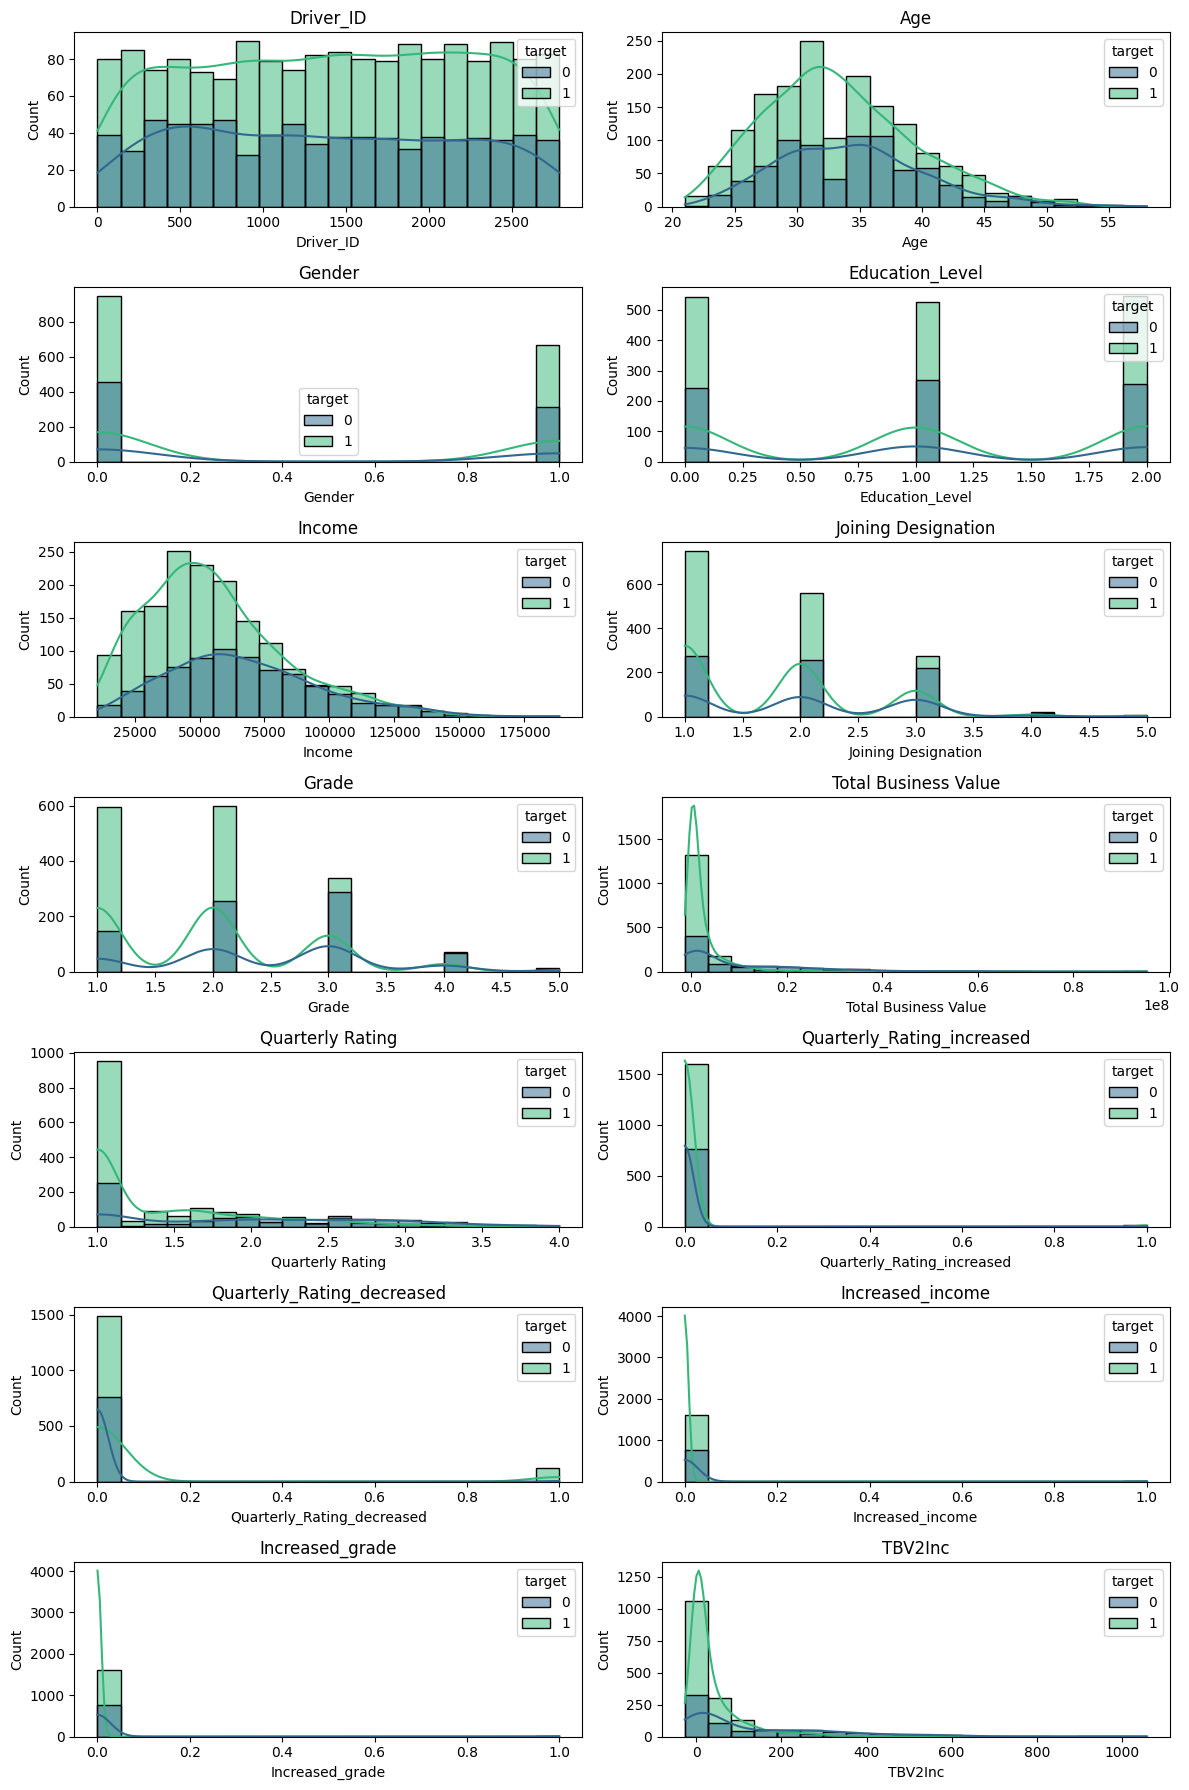

In [86]:
cols = df_grouped.select_dtypes(include=['int64', 'float64']).columns

num_cols = 2
num_rows = (len(cols) + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 18))

axes = axes.flatten()

for index, col in enumerate(cols):
    sns.histplot(data=df_grouped, x=col, bins=20, ax=axes[index], kde=True, hue='target', palette='viridis')
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='City', ylabel='count'>

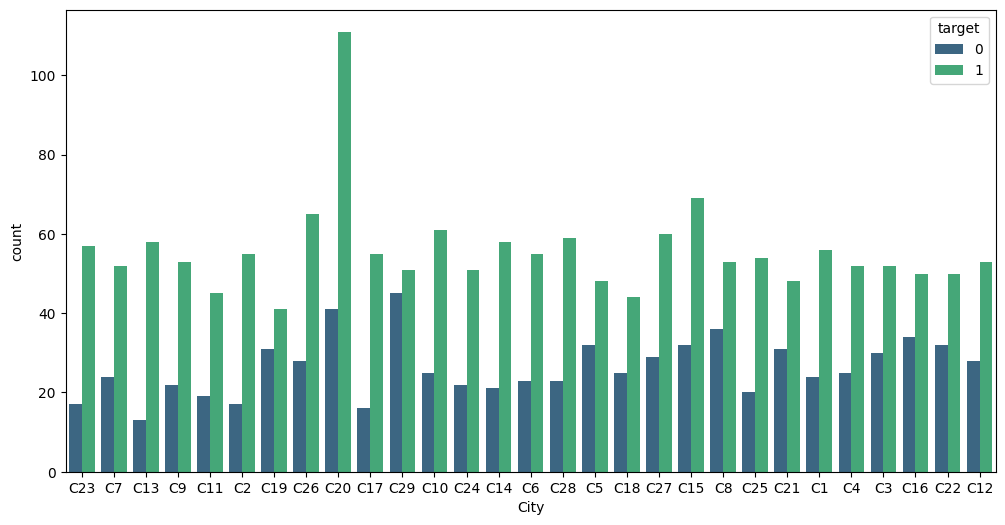

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_grouped, x='City', hue='target', palette='viridis')

<Axes: xlabel='Grade', ylabel='Income'>

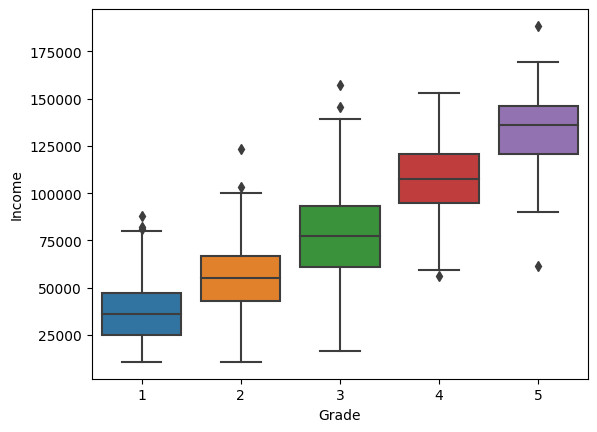

In [88]:
sns.boxplot(data=df_grouped, x='Grade', y='Income')

<Axes: xlabel='target', ylabel='Income'>

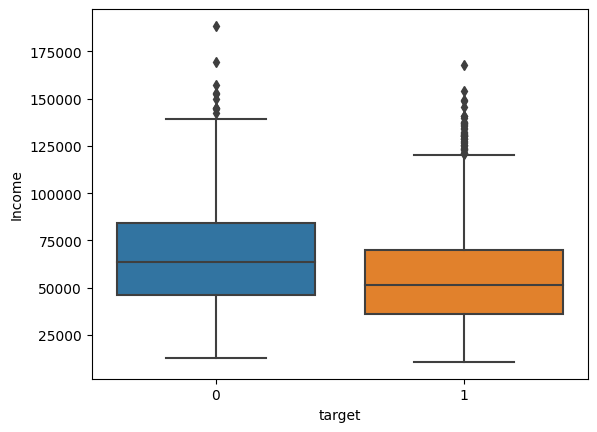

In [89]:
sns.boxplot(data=df_grouped, x='target', y='Income')

<Axes: xlabel='target', ylabel='Grade'>

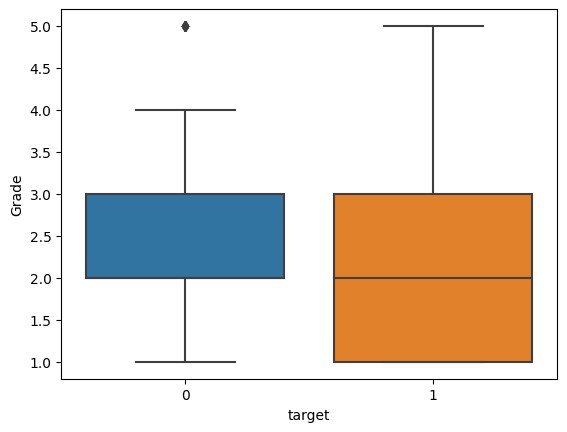

In [90]:
sns.boxplot(data=df_grouped, x='target', y='Grade')

<Axes: xlabel='target', ylabel='Total Business Value'>

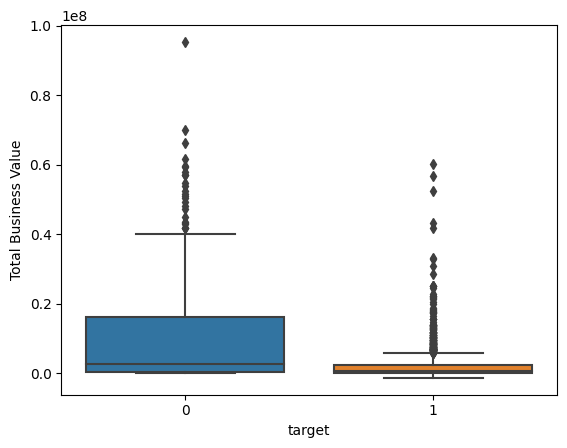

In [91]:
sns.boxplot(data=df_grouped, x='target', y='Total Business Value')

<Axes: xlabel='City', ylabel='QR_round'>

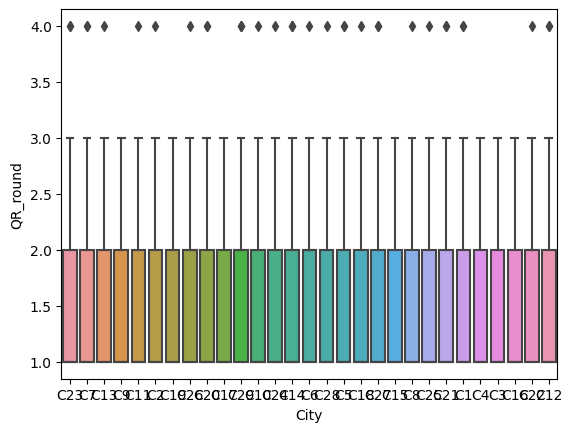

In [92]:
df_grouped['QR_round'] = round(df_grouped['Quarterly Rating'],0)
sns.boxplot(data=df_grouped, x='City', y='QR_round')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


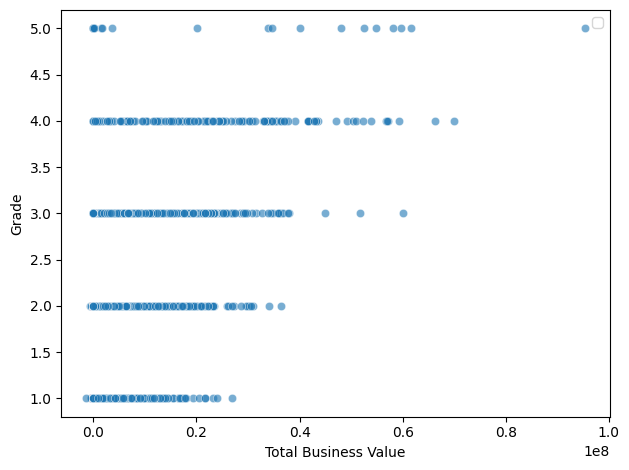

In [93]:
sns.scatterplot(data=df_grouped, x='Total Business Value', y='Grade', alpha=0.6)

plt.tight_layout()

plt.legend()
plt.show()

<Axes: xlabel='Quarterly_Rating_decreased', ylabel='Total Business Value'>

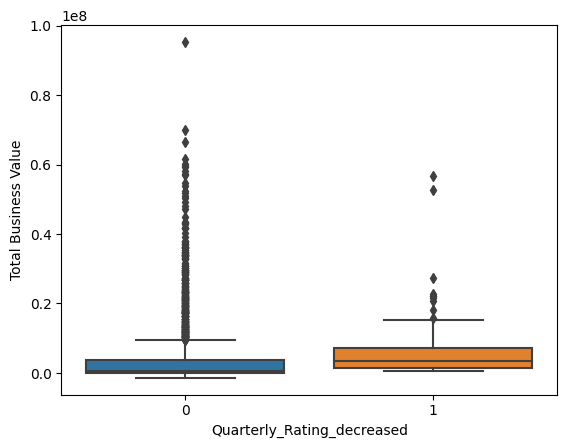

In [94]:
sns.boxplot(data=df_grouped, x='Quarterly_Rating_decreased', y='Total Business Value')

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\2887216097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


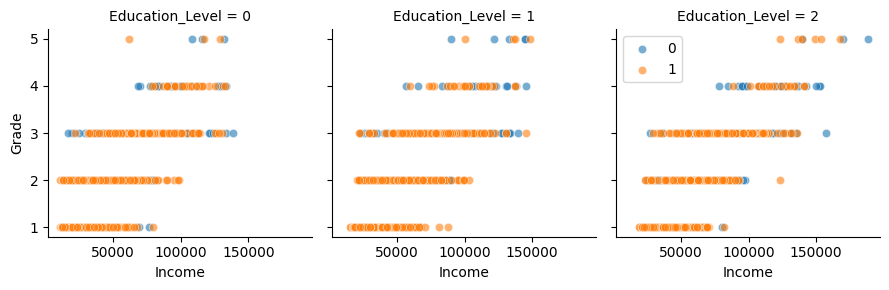

In [95]:
g = sns.FacetGrid(df_grouped, col='Education_Level', hue='target')

g.map(sns.scatterplot, 'Income', 'Grade', alpha=0.6)

plt.tight_layout()

plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\3932591937.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


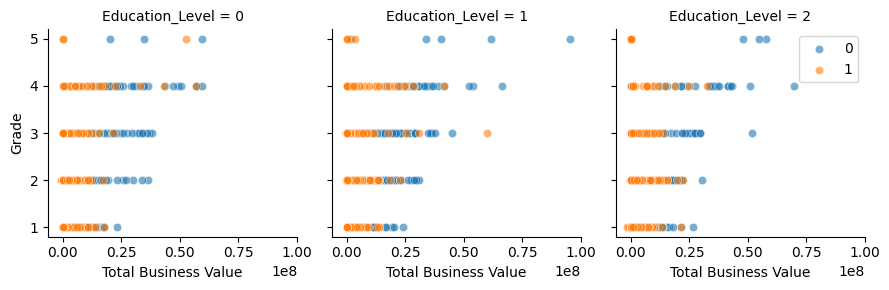

In [96]:
g = sns.FacetGrid(df_grouped, col='Education_Level', hue='target')

g.map(sns.scatterplot, 'Total Business Value', 'Grade', alpha=0.6)

plt.tight_layout()

plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\222229786.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


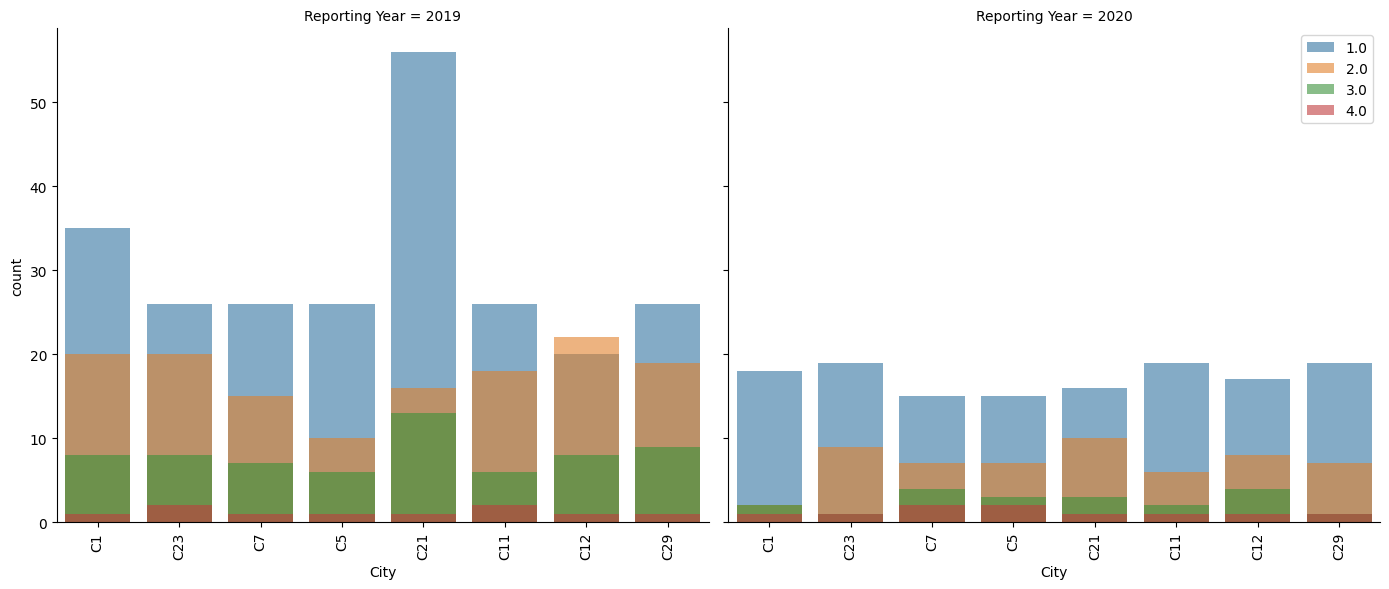

In [97]:
df_grouped['Reporting Year']=df_grouped['MMM-YY'].dt.year
df_grouped['QR_round'] = round(df_grouped['Quarterly Rating'],0)
g = sns.FacetGrid(df_grouped, col='Reporting Year', hue='QR_round')

g.map(sns.countplot, 'City', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)

plt.tight_layout()

plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_101556\90383345.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


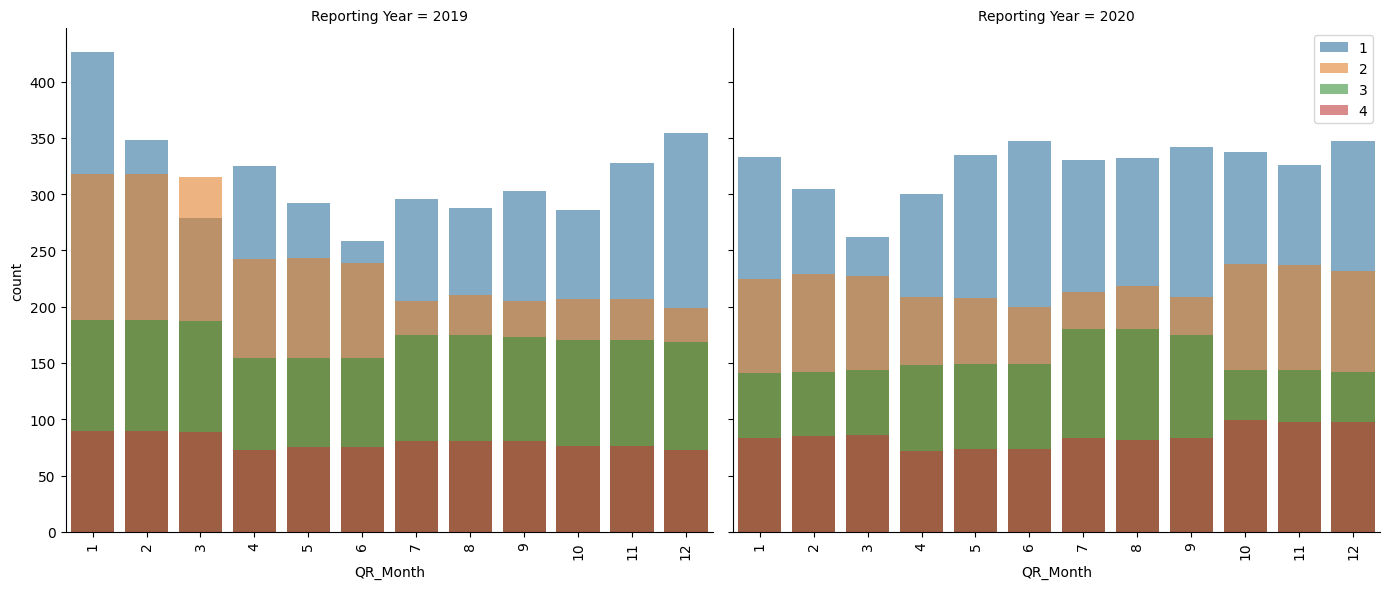

In [98]:
df['Reporting Year']=df['MMM-YY'].dt.year
df['QR_Month'] = df['MMM-YY'].dt.month
df['QR_round'] = round(df['Quarterly Rating'],0)
g = sns.FacetGrid(df, col='Reporting Year', hue='QR_round')

g.map(sns.countplot, 'QR_Month', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)

plt.tight_layout()

plt.legend()
plt.show()

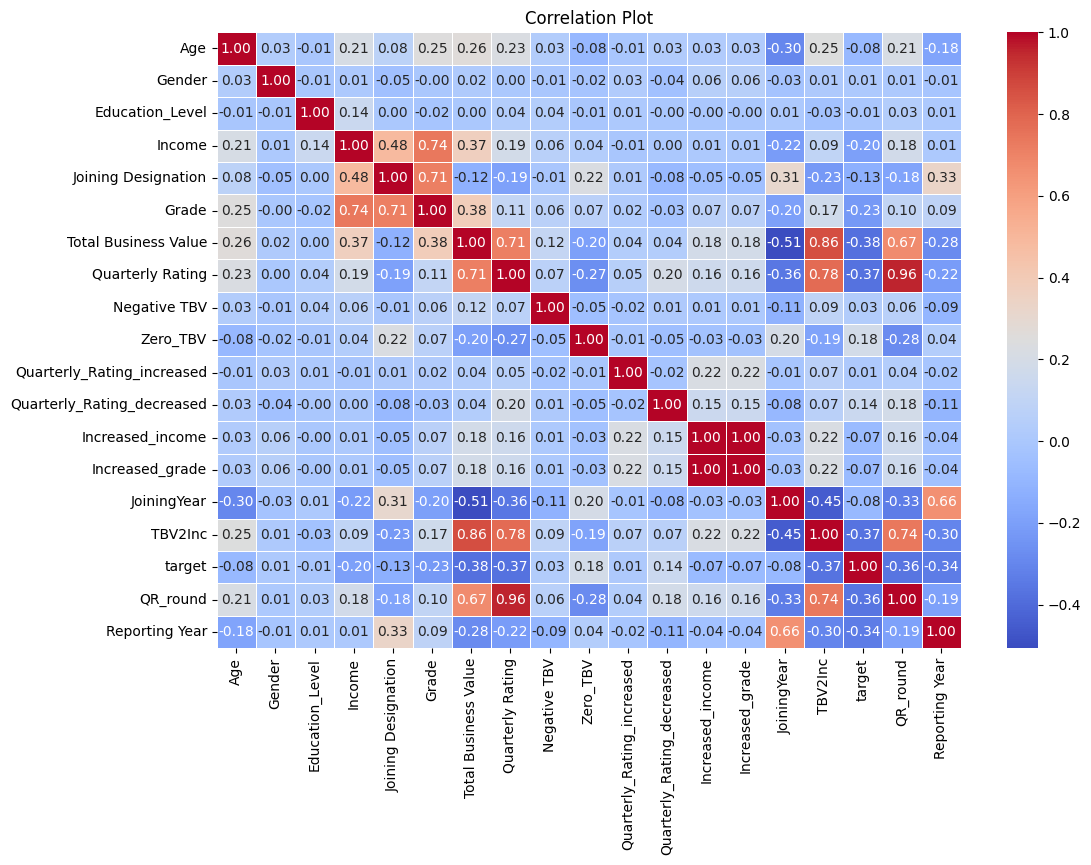

In [99]:
df_num=df_grouped.drop(['City', 'Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate'],axis=1)
correlation_matrix = df_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [100]:
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

df_grouped['City'] = df_grouped['City'].map(city_mapping)

In [101]:
df_grouped['Ranking'] =df_grouped['Grade']+(df_grouped['Joining Designation'])

In [102]:
X=df_grouped.drop(['target', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'Education_Level', 'Grade', 'Joining Designation', 'Reporting Year', 'QR_round', 'Driver_ID'], axis=1)
y=df_grouped['target']

In [104]:
from sklearn.preprocessing import StandardScaler

cols = X.columns

scale = StandardScaler()

X_scaled = scale.fit_transform(X)

X_scaled = pd.DataFrame(data=X_scaled, columns=cols)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [106]:
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9495798319327731
Validation Accuracy: 0.8574423480083857


In [107]:
for score, name in zip(rf_classifier.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.05 Age
0.01 Gender
0.06 City
0.08 Income
0.16 Total Business Value
0.1 Quarterly Rating
0.0 Negative TBV
0.09 Zero_TBV
0.0 Quarterly_Rating_increased
0.02 Quarterly_Rating_decreased
0.0 Increased_income
0.0 Increased_grade
0.25 JoiningYear
0.13 TBV2Inc
0.04 Ranking


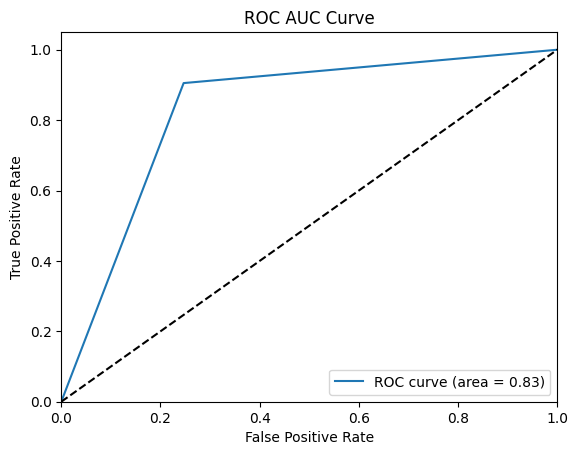

In [108]:
roc_auc = roc_auc_score(y_test, pred_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

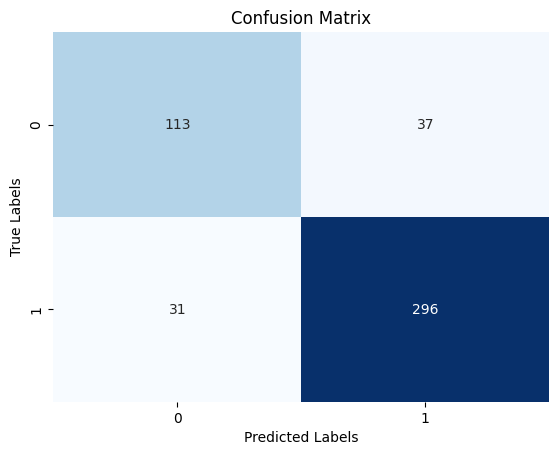


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       150
           1       0.89      0.91      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



In [109]:
cm = confusion_matrix(y_test, pred_test)
print()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [112]:
import lightgbm as lgb

lgb_classifier = lgb.LGBMClassifier(n_estimators=150, boosting_type='gbdt', learning_rate=0.02, random_state=42)

lgb_classifier.fit(X_train, y_train)

pred_train = lgb_classifier.predict(X_train)
pred_test = lgb_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
Train Accuracy: 0.9343487394957983
Validation Accuracy: 0.8658280922431866


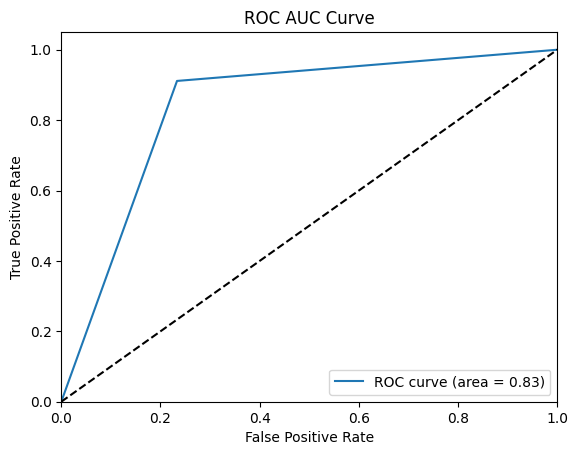

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

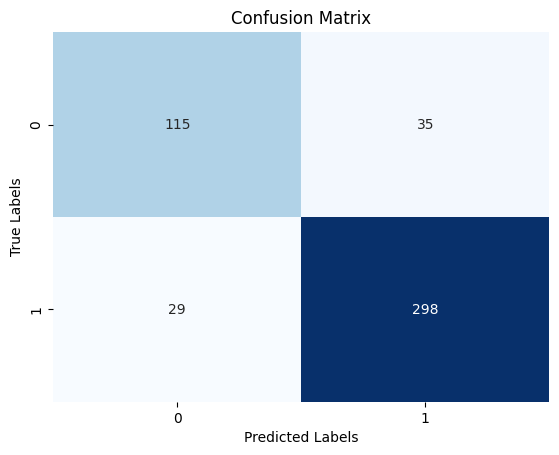


 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.89      0.91      0.90       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.84       477
weighted avg       0.86      0.87      0.87       477



In [114]:
cm = confusion_matrix(y_test, pred_test)
print()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [115]:
xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.095, random_state=42)

xgb_classifier.fit(X_train, y_train)

pred_train = xgb_classifier.predict(X_train)
pred_test = xgb_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')


Train Accuracy: 0.9332983193277311
Validation Accuracy: 0.8616352201257862


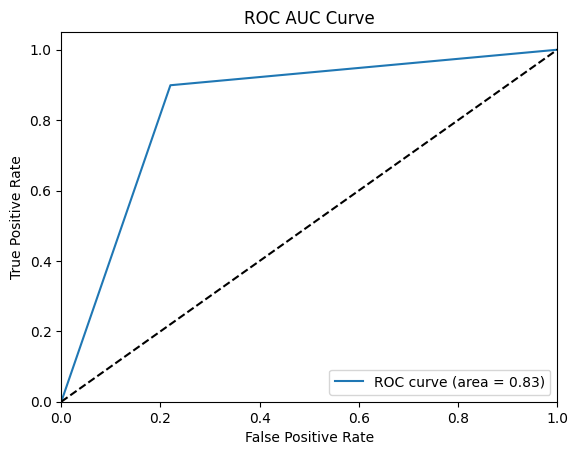

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()


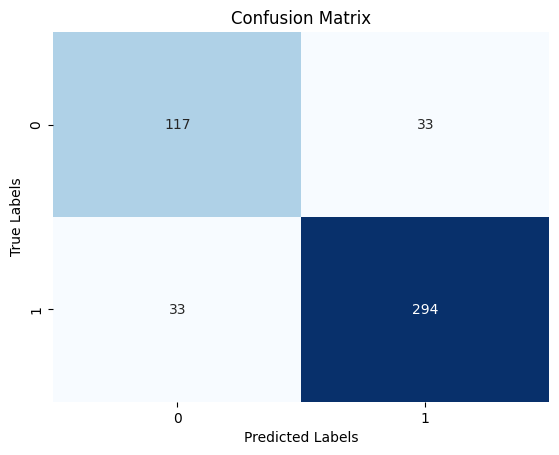


 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.90      0.90      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



In [117]:
cm = confusion_matrix(y_test, pred_test)
print()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.131, random_state=42)

gb_clf.fit(X_train, y_train)

pred_test = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.8721174004192872


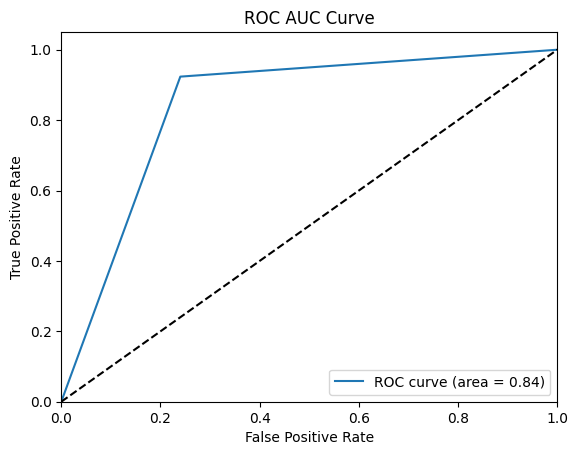

In [119]:

roc_auc = roc_auc_score(y_test, pred_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

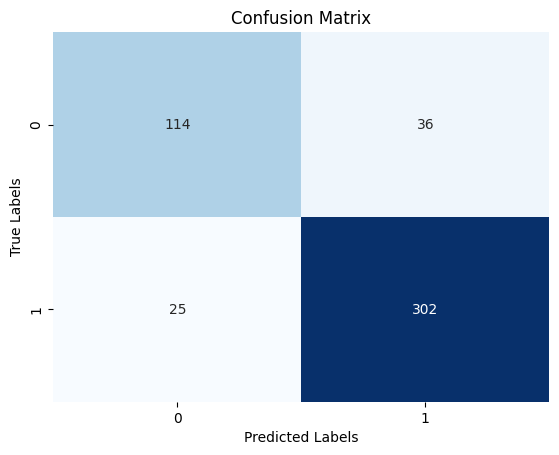


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       150
           1       0.89      0.92      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



In [120]:
cm = confusion_matrix(y_test, pred_test)
print()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [121]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators=80, learning_rate=0.84, random_state=42)  # You can specify the number of estimators (weak learners)

adaboost_clf.fit(X_train, y_train)

pred_test = adaboost_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.8805031446540881


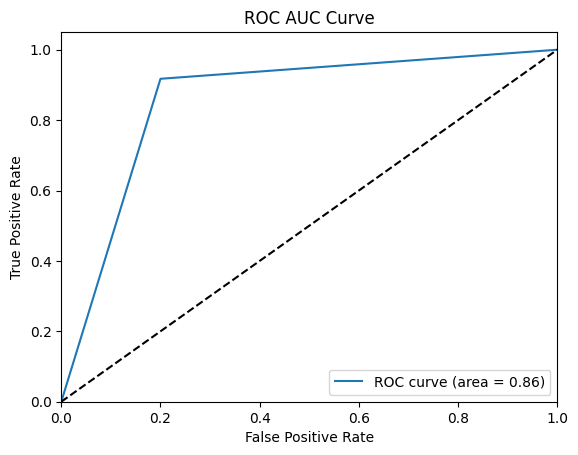

In [122]:
roc_auc = roc_auc_score(y_test, pred_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

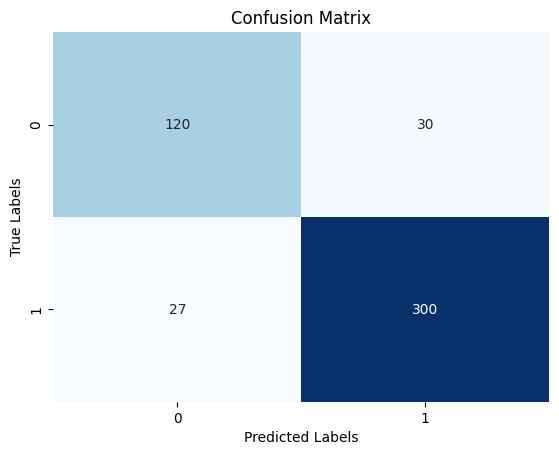


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.91      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [123]:
cm = confusion_matrix(y_test, pred_test)
print()

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
voting_classifier = VotingClassifier(
    estimators=[
        # ('rf', rf_classifier),
        ('lgb', lgb_classifier),
        ('ada', adaboost_clf),
        ('gbdt', gb_clf),
        # ('xgb', xgb_classifier)
    ],
    voting='hard',
    n_jobs=-1,
    # weights=[1,2,2,1,1]
)

voting_classifier.fit(X_train, y_train)

pred_train = voting_classifier.predict(X_train)
pred_test = voting_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

In [ ]:
roc_auc = roc_auc_score(y_test, pred_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_test)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cm = confusion_matrix(y_test, pred_test)
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\n Classification Report:")
print(classification_report(y_test, pred_test))

In [ ]:
# conclusions

# Based on the performance metrics, the OLA may consider using Adaptive Boost as the primary model for churn prediction,
#  as it achieves the highest scores across most evaluation metrics